In [101]:
from _plotly_future_ import v4_subplots
from plotly.subplots import make_subplots

import itertools

import pandas as pd
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1000)
import numpy as np
import scipy as scp
import scipy.stats as ss
import sklearn.metrics as sm

from scipy.integrate import quad
import matplotlib.pyplot as plt

import scipy.special as scps
from statsmodels.graphics.gofplots import qqplot
from scipy.linalg import cholesky
from functools import partial
from scipy.optimize import minimize, brute, fmin
from IPython.display import display
import sympy; sympy.init_printing()
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import pickle 

from tqdm import tqdm

def display_matrix(m):
    display(sympy.Matrix(m))

In [13]:
pickle_in = open("./data/cleaned_data","rb")
data = pickle.load(pickle_in)
pickle_in.close()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
data.head()

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
0,19960104,C,600000,24.750,25.750,150,0.110927,0.197260,617.700012,3,BC_3MONTH,5.19,1996-01-04
1,19960104,P,615000,10.125,10.875,156,0.125890,0.197260,617.700012,3,BC_3MONTH,5.19,1996-01-04
2,19960104,P,550000,11.625,13.250,5,0.159369,1.463014,617.700012,12,BC_1YEAR,5.19,1996-01-04
3,19960104,P,600000,6.000,6.500,3917,0.136913,0.197260,617.700012,3,BC_3MONTH,5.19,1996-01-04
4,19960104,P,560000,1.750,2.000,3,0.176965,0.197260,617.700012,3,BC_3MONTH,5.19,1996-01-04


In [41]:
# Get call option prices of one day
dateidx = data.date == '20130515'
cp_flagidx = data.cp_flag == 'C'
data_1 = data.loc[dateidx & cp_flagidx,:]

# At the money calls
moneyness = (data_1.strike_price/1000)/data_1.loc[:,"Adj Close"]
atmidx = (0.8<=moneyness) & (1.2>=moneyness)
data_1 = data_1.loc[atmidx,:]
# Remove low volume
q90 = np.quantile(data_1.volume, 0.9)
q90idx = data_1.volume > q90
data_1 = data_1.loc[q90idx,:]

# np.quantile(data_1.volume, 0.90)

In [47]:
data_1

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
4288037,20130515,C,1600000,57.40,60.00,21364,0.233895,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288042,20130515,C,1625000,32.80,35.40,6920,0.236212,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288043,20130515,C,1630000,28.00,30.60,1594,0.226510,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288044,20130515,C,1635000,23.40,25.80,4512,0.216688,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288045,20130515,C,1640000,19.20,21.00,2480,0.209295,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288046,20130515,C,1645000,14.90,16.80,7511,0.201980,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288047,20130515,C,1650000,10.90,12.20,26907,0.181489,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288048,20130515,C,1655000,7.60,8.60,8012,0.175650,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288049,20130515,C,1660000,4.40,5.40,37447,0.159595,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288050,20130515,C,1665000,2.45,2.95,18449,0.151693,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15


Text(0.5, 0.92, 'Market IV')

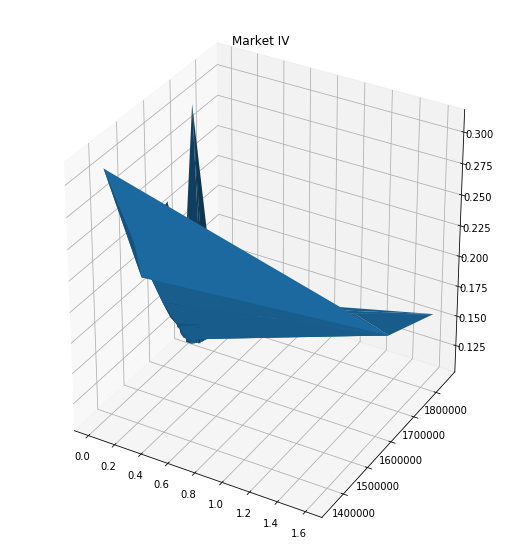

In [48]:
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(data_1['t2m'], 
                 data_1['strike_price'], 
                 data_1['impl_volatility'])
ax2.set_title('Market IV')

In [100]:
def cf_Heston_schoutens(u, S0, t, mu, v0, kappa, theta, rho, sigma):
    """
    Heston characteristic function as proposed by Schoutens (2004)
    """
    phi = kappa - sigma*rho*u*1j
    d  = np.sqrt( ((-phi)**2) - ((sigma**2) * (-1j*u - u**2 )) )
    g  = (phi-d)/(phi+d)
    
    cf = np.exp((1j*u)*(np.log(S0)+mu*t)) * \
         np.exp((kappa*theta)/(sigma**2) * ( (phi-d)*t - 2*np.log( (1-g*np.exp(-d*t))/(1-g) ))) *\
         np.exp((v0/sigma**2)*(phi-d) * (1-np.exp(-d*t))/(1-g*np.exp(-d*t)) )
    return cf

def xi(u, alpha, S0, t, mu, v0, kappa, theta, rho, sigma):
    
    cf = cf_Heston_schoutens(u - (alpha+1)*1j,
                             S0, t, mu, v0, kappa, theta, rho, sigma)
    numerator = np.exp(-mu*t)*cf
    denominator = alpha**2 + alpha - u**2 + 1j*(2*alpha+1)*u
    return numerator/denominator

def call_price(alpha, S0, K, t, mu, par):
    v0, kappa, theta, rho, sigma = par
    multiplier = np.exp(-alpha*np.log(K))/np.pi
    integrand = lambda u: (np.exp(-1j*u*np.log(K)))*xi(u, alpha, S0, t, mu, v0, kappa, theta, rho, sigma)
    return multiplier * quad(integrand, limit=1000, a=0, b=np.inf)[0] 

In [63]:
data_1.iloc[45,:]

date                          20130515
cp_flag                              C
strike_price                   1665000
best_bid                          28.7
best_offer                          30
volume                            7335
impl_volatility               0.125936
t2m                           0.180822
Adj Close                      1658.78
riskfree_mo                          3
term                         BC_3MONTH
yield                             0.04
dt                 2013-05-15 00:00:00
Name: 4288757, dtype: object

In [223]:
%time
v0 = 0.013681                                        # spot variance
rho = -0.620100                                      # correlation coefficient
kappa = 1.605179                                     # mean reversion coefficient
theta = 0.053318                                     # long-term mean of the variance
sigma = 0.590506                                     # (Vol of Vol) - Volatility of instantaneous variance

r = mu = np.float(data_1.iloc[45,:]['yield'])                                        # drift
t = T = np.float(data_1.iloc[45,:]['t2m'])                                            # Time to mat
K = np.float(data_1.iloc[45,:]['strike_price'])/1000                                             # Stike  
S0 = np.float(data_1.iloc[45,:]['Adj Close'])                                          # spot stock price 

alpha = 0.75
# par = v0, kappa, theta, rho, sigma
par = [0.01277087,  1.79809331,  0.04495749, -0.91204852,  0.30023209]
call_price(alpha, S0, K, t, mu, par)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


1. Check total volume
2. 

In [70]:
np.sum(data_1.volume) / np.sum(data.loc[dateidx & cp_flagidx,'volume'])

In [77]:
data_1.head()

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
4288037,20130515,C,1600000,57.4,60.0,21364,0.233895,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288042,20130515,C,1625000,32.8,35.4,6920,0.236212,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288043,20130515,C,1630000,28.0,30.6,1594,0.226510,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288044,20130515,C,1635000,23.4,25.8,4512,0.216688,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288045,20130515,C,1640000,19.2,21.0,2480,0.209295,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15


In [90]:

data_1.apply(lambda row: call_price(par=par,
                                    S0=S0,
                                    K=row.strike_price,
                                    mu=0.2,   t=row.t2m, 
                                    alpha=alpha), axis=1)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.



KeyboardInterrupt: 

In [107]:
HSprice = []
for rowN in range(3):#tqdm(range(len(data_1))):
    row = data_1.iloc[rowN,:]
    p = call_price(par=par,
               S0=S0,
               K=row.strike_price,
               mu=row.loc['yield'],
               t=row.t2m, alpha=alpha)
    HSprice.append(p)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning:

The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.



In [177]:
row

date                          20130515
cp_flag                              C
strike_price                   1670000
best_bid                          1.15
best_offer                        1.75
volume                           29801
impl_volatility               0.152183
t2m                         0.00821918
Adj Close                      1658.78
riskfree_mo                          1
term                         BC_1MONTH
yield                             0.01
dt                 2013-05-15 00:00:00
Name: 4288051, dtype: object

In [184]:
%time 
HSprice = []
for rowN in (range(len(data_1))):
    row = data_1.iloc[rowN,:]
    S0 = row.loc['Adj Close']
    K=row.strike_price/1000
    mu=row.loc['yield']
    t=row.t2m
    alpha=0.75
    par=par
    p=call_price(par=par,
                   S0=S0,
                   K=K,
                   mu=mu,
                   t=t,
               alpha=alpha)
    HSprice.append(p)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.01 µs


In [181]:
midprice = data_1.best_offer - data_1.best_bid 
np.sum(np.abs(np.array(HSprice) - midprice))

In [186]:
data_1.head()

,date,cp_flag,strike_price,best_bid,best_offer,volume,impl_volatility,t2m,Adj Close,riskfree_mo,term,yield,dt
4288037,20130515,C,1600000,57.4,60.0,21364,0.233895,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288042,20130515,C,1625000,32.8,35.4,6920,0.236212,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288043,20130515,C,1630000,28.0,30.6,1594,0.226510,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288044,20130515,C,1635000,23.4,25.8,4512,0.216688,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15
4288045,20130515,C,1640000,19.2,21.0,2480,0.209295,0.008219,1658.780029,1,BC_1MONTH,0.01,2013-05-15


In [224]:
def call_price_LF(par, target_price, S0, K, t, mu, alpha):
    assert len(S0) == len(K) == len(t) == len(mu)
    HSprice = []
#     print(len(S0))
    for i in range(len(S0)):
        _S0=S0.iloc[i]
        _K=K.iloc[i]/1000
        _mu=mu.iloc[i]
        _t=t.iloc[i]
        alpha=0.75
        _par=par
#         print(_S0, _K, _mu, _t)
        p=call_price(par=_par,
                       S0=_S0,
                       K=_K,
                       mu=_mu,
                       t=_t,
                   alpha=alpha)
        HSprice.append(p)
    loss = np.mean(np.abs(np.array(HSprice) - target_price))
    
    return loss

In [225]:
len(data_1.loc[:,'Adj Close'])

In [226]:
midprice = data_1.best_offer - data_1.best_bid 

call_price_LF(par=par, target_price=midprice,
              S0=data_1.loc[:,'Adj Close'], 
              K=data_1.strike_price,
              t = data_1.t2m, 
              mu=data_1.loc[:,'yield'], alpha=0.75)

In [227]:
call_price_LF2opt = partial(call_price_LF,
                            target_price=midprice,
              S0=data_1.loc[:,'Adj Close'], 
              K=data_1.strike_price,
              t = data_1.t2m, 
              mu=data_1.loc[:,'yield'], alpha=0.75)

In [228]:
opt = fmin(call_price_LF2opt , par,
           xtol=0.001, ftol=0.001,
           maxiter=1000, maxfun=50)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning:

The integral is probably divergent, or slowly convergent.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

overflow encountered in exp

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

invalid value encountered in cdouble_scalars

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in multiply

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning:

The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: IntegrationWarning:

The maximum number of subdivisions (1000) has been achieved.
  If in

In [229]:
%time
v0 = 0.013681                                        # spot variance
rho = -0.620100                                      # correlation coefficient
kappa = 1.605179                                     # mean reversion coefficient
theta = 0.053318                                     # long-term mean of the variance
sigma = 0.590506                                     # (Vol of Vol) - Volatility of instantaneous variance

r = mu = np.float(data_1.iloc[45,:]['yield'])                                        # drift
t = T = np.float(data_1.iloc[45,:]['t2m'])                                            # Time to mat
K = np.float(data_1.iloc[45,:]['strike_price'])/1000                                             # Stike  
S0 = np.float(data_1.iloc[45,:]['Adj Close'])                                          # spot stock price 

alpha = 0.75
# par = v0, kappa, theta, rho, sigma
par = [0.01277087,  1.79809331,  0.04495749, -0.91204852,  0.30023209]
call_price(alpha, S0, K, t, mu, par=opt)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [232]:
call_price_LF(opt, midprice, S0, K, t, mu, alpha)

TypeError: object of type 'float' has no len()